# Table of contents
- [Importing Data](#01)
- [Data Cleaning](#02)
- [Removing Outliers](#03)
- [Exploratory Data Analysis](#04)
- [Feature Engineering](#05)
- [Modelling](#06)

# Importing necessary libraries <a class = "anchor" id="01"></a> 

In [1]:
# Importing necessary libraries <a class = "anchor" id="01"></a> 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing the calendar table
df_cal = pd.read_csv('calendar.csv')

In [3]:
df_cal

,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1,40334325,2022-08-03 00:00:00.000000,0,56.0,56.0,3,5
1,2,22742449,2022-11-13 00:00:00.000000,1,95.0,95.0,2,99
2,3,34621717,2022-04-17 00:00:00.000000,0,75.0,75.0,2,1125
3,4,38281744,2022-01-31 00:00:00.000000,1,150.0,150.0,1,1000
4,5,18835003,2022-05-21 00:00:00.000000,0,100.0,100.0,2,1125
...,...,...,...,...,...,...,...,...
319187,319188,52729945,2022-07-06 00:00:00.000000,1,64.0,64.0,1,10
319188,319189,36953202,2022-07-08 00:00:00.000000,0,140.0,140.0,3,1125
319189,319190,39580214,2022-06-13 00:00:00.000000,1,49.0,49.0,1,13
319190,319191,49016014,2022-10-26 00:00:00.000000,0,60.0,60.0,2,30


In [4]:
df_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319192 entries, 0 to 319191
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   calender_id     319192 non-null  int64  
 1   listing_id      319192 non-null  int64  
 2   date            319192 non-null  object 
 3   available       319192 non-null  int64  
 4   price           319117 non-null  float64
 5   adjusted_price  319117 non-null  float64
 6   minimum_nights  319192 non-null  int64  
 7   maximum_nights  319192 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 19.5+ MB


### Removing the blank rows where price & adjusted_price is null

In [5]:
df_cal.dropna(inplace=True)

In [6]:
df_cal = df_cal.reset_index()

In [7]:
df_cal

,index,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,0,1,40334325,2022-08-03 00:00:00.000000,0,56.0,56.0,3,5
1,1,2,22742449,2022-11-13 00:00:00.000000,1,95.0,95.0,2,99
2,2,3,34621717,2022-04-17 00:00:00.000000,0,75.0,75.0,2,1125
3,3,4,38281744,2022-01-31 00:00:00.000000,1,150.0,150.0,1,1000
4,4,5,18835003,2022-05-21 00:00:00.000000,0,100.0,100.0,2,1125
...,...,...,...,...,...,...,...,...,...
319112,319187,319188,52729945,2022-07-06 00:00:00.000000,1,64.0,64.0,1,10
319113,319188,319189,36953202,2022-07-08 00:00:00.000000,0,140.0,140.0,3,1125
319114,319189,319190,39580214,2022-06-13 00:00:00.000000,1,49.0,49.0,1,13
319115,319190,319191,49016014,2022-10-26 00:00:00.000000,0,60.0,60.0,2,30


In [8]:
df_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319117 entries, 0 to 319116
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   index           319117 non-null  int64  
 1   calender_id     319117 non-null  int64  
 2   listing_id      319117 non-null  int64  
 3   date            319117 non-null  object 
 4   available       319117 non-null  int64  
 5   price           319117 non-null  float64
 6   adjusted_price  319117 non-null  float64
 7   minimum_nights  319117 non-null  int64  
 8   maximum_nights  319117 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 21.9+ MB


In [9]:
# Grouping the Calendar table(df_cal) by 'listing_id' and calculating the mean of 'price', 
# 'minimum_nights', and 'maximum_nights'  for each group
df_cal_combined = pd.DataFrame(df_cal.groupby('listing_id')[['price','minimum_nights','maximum_nights']].mean())

In [10]:
df_cal_combined

,price,minimum_nights,maximum_nights
listing_id,,,
50904,165.329670,1.0,60.0
116134,150.000000,2.0,1125.0
218916,85.000000,1.0,50.0
224333,16.000000,14.0,365.0
224682,87.272727,2.0,30.0
...,...,...,...
53916524,88.000000,3.0,365.0
53928545,49.000000,20.0,1125.0
53929354,90.000000,1.0,365.0


In [11]:
# importing the listing table
df_lis = pd.read_csv('listings.csv')

In [12]:
df_lis.head()

,listing_id,listing_url,name,description,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds,amenities,host_id
0,50904,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,Decorated in a vintage style combined with a f...,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1 private bath,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077
1,116134,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,Enjoy your stay at our 4 person apartment in t...,51.230510,4.405930,Entire rental unit,Entire home/apt,4,2.5 baths,2.0,2.0,"[""Refrigerator"", ""Elevator"", ""Paid street park...",586942
2,218916,https://www.airbnb.com/rooms/218916,Apartment with terrace in trendy Zurenborg,Do you enjoy authentic places with a lot of ch...,51.206330,4.429420,Entire condominium (condo),Entire home/apt,5,1 bath,1.0,3.0,"[""Paid street parking off premises"", ""Kitchen""...",915664
3,224333,https://www.airbnb.com/rooms/224333,Large stylish room in 1930s house + garden,"Large bedroom in classic 1930s house. Kitchen,...",51.197720,4.458530,Private room in residential home,Private room,2,2 shared baths,1.0,1.0,"[""Fire extinguisher"", ""Backyard"", ""Long term s...",1167377
4,224682,https://www.airbnb.com/rooms/224682,APARTMENT ROSCAM - OLD CENTRE ANTWERP,"<b>The space</b><br />Apartment ""Roscam"" is a ...",51.217220,4.397900,Entire rental unit,Entire home/apt,3,1 bath,1.0,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Sh...",1263933


In [13]:
df_lis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   listing_id      1749 non-null   int64  
 1   listing_url     1749 non-null   object 
 2   name            1749 non-null   object 
 3   description     1679 non-null   object 
 4   latitude        1749 non-null   float64
 5   longitude       1749 non-null   float64
 6   property_type   1749 non-null   object 
 7   room_type       1749 non-null   object 
 8   accomodates     1749 non-null   int64  
 9   bathrooms_text  1749 non-null   object 
 10  bedrooms        1621 non-null   float64
 11  beds            1708 non-null   float64
 12  amenities       1749 non-null   object 
 13  host_id         1749 non-null   int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 191.4+ KB


In [14]:
#joining the listing table(df_lis) with combined calendar table(df_cal_combined)
df_liscal = df_lis.merge(df_cal_combined, on='listing_id', how='inner')

In [15]:
df_liscal.head()

,listing_id,listing_url,name,description,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds,amenities,host_id,price,minimum_nights,maximum_nights
0,50904,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,Decorated in a vintage style combined with a f...,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1 private bath,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077,165.329670,1.0,60.0
1,116134,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,Enjoy your stay at our 4 person apartment in t...,51.230510,4.405930,Entire rental unit,Entire home/apt,4,2.5 baths,2.0,2.0,"[""Refrigerator"", ""Elevator"", ""Paid street park...",586942,150.000000,2.0,1125.0
2,218916,https://www.airbnb.com/rooms/218916,Apartment with terrace in trendy Zurenborg,Do you enjoy authentic places with a lot of ch...,51.206330,4.429420,Entire condominium (condo),Entire home/apt,5,1 bath,1.0,3.0,"[""Paid street parking off premises"", ""Kitchen""...",915664,85.000000,1.0,50.0
3,224333,https://www.airbnb.com/rooms/224333,Large stylish room in 1930s house + garden,"Large bedroom in classic 1930s house. Kitchen,...",51.197720,4.458530,Private room in residential home,Private room,2,2 shared baths,1.0,1.0,"[""Fire extinguisher"", ""Backyard"", ""Long term s...",1167377,16.000000,14.0,365.0
4,224682,https://www.airbnb.com/rooms/224682,APARTMENT ROSCAM - OLD CENTRE ANTWERP,"<b>The space</b><br />Apartment ""Roscam"" is a ...",51.217220,4.397900,Entire rental unit,Entire home/apt,3,1 bath,1.0,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Sh...",1263933,87.272727,2.0,30.0


In [16]:
df_liscal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1749 entries, 0 to 1748
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   listing_id      1749 non-null   int64  
 1   listing_url     1749 non-null   object 
 2   name            1749 non-null   object 
 3   description     1679 non-null   object 
 4   latitude        1749 non-null   float64
 5   longitude       1749 non-null   float64
 6   property_type   1749 non-null   object 
 7   room_type       1749 non-null   object 
 8   accomodates     1749 non-null   int64  
 9   bathrooms_text  1749 non-null   object 
 10  bedrooms        1621 non-null   float64
 11  beds            1708 non-null   float64
 12  amenities       1749 non-null   object 
 13  host_id         1749 non-null   int64  
 14  price           1749 non-null   float64
 15  minimum_nights  1749 non-null   float64
 16  maximum_nights  1749 non-null   float64
dtypes: float64(7), int64(3), object(7

In [17]:
# Importing hosts table
df_hos = pd.read_csv('hosts.csv')

In [18]:
df_hos.head()

,host_id,host_name,host_since,host_location,host_about
0,234077,Karin,2010-09-14 00:00:00.000000,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...
1,334804,Ann,2011-01-04 00:00:00.000000,"Antwerp, Flemish Region, Belgium","Ciao, \r\nlooking forward to meet you!\r\nI lo..."
2,413052,Valérie,2011-02-27 00:00:00.000000,"Antwerp, Flanders, Belgium",NaN
3,452791,Tatiana,2011-03-20 00:00:00.000000,"Antwerp, Flanders, Belgium",World traveler with a penchant for adrenaline ...
4,462975,Els,2011-03-25 00:00:00.000000,"Edegem, Flanders, Belgium",I studied languages and cultural anthropology ...


In [19]:
df_hos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   host_id        1111 non-null   int64 
 1   host_name      1111 non-null   object
 2   host_since     1111 non-null   object
 3   host_location  1108 non-null   object
 4   host_about     490 non-null    object
dtypes: int64(1), object(4)
memory usage: 43.5+ KB


In [20]:
# Converting the 'host_since' column to datetime format
df_hos['host_since'] = pd.to_datetime(df_hos['host_since'])
# Calculating the experience of each host in years by subtracting the year of their registration from the current year
df_hos['Exp_in_years']= pd.to_datetime('today').year - df_hos['host_since'].dt.year

In [21]:
df_hos.head()

,host_id,host_name,host_since,host_location,host_about,Exp_in_years
0,234077,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...,14
1,334804,Ann,2011-01-04,"Antwerp, Flemish Region, Belgium","Ciao, \r\nlooking forward to meet you!\r\nI lo...",13
2,413052,Valérie,2011-02-27,"Antwerp, Flanders, Belgium",NaN,13
3,452791,Tatiana,2011-03-20,"Antwerp, Flanders, Belgium",World traveler with a penchant for adrenaline ...,13
4,462975,Els,2011-03-25,"Edegem, Flanders, Belgium",I studied languages and cultural anthropology ...,13


In [22]:
# Combinig the hosts table with combined table of calendar & listings
df_liscalhos = df_liscal.merge(df_hos, on='host_id',how='inner')

In [23]:
df_liscalhos.head()

,listing_id,listing_url,name,description,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,...,amenities,host_id,price,minimum_nights,maximum_nights,host_name,host_since,host_location,host_about,Exp_in_years
0,50904,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,Decorated in a vintage style combined with a f...,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1 private bath,...,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077,165.329670,1.000000,60.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...,14
1,891884,https://www.airbnb.com/rooms/891884,aplace/antwerp: amazing suite & square view,This second floor suite with a splendid square...,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1 private bath,...,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",234077,174.891304,1.293478,1125.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...,14
2,891907,https://www.airbnb.com/rooms/891907,aplace/antwerp: stunning flat with square view,"While entering this well located flat, you'll ...",51.218575,4.398631,Entire rental unit,Entire home/apt,4,1.5 baths,...,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",234077,203.463855,2.975904,1125.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...,14
3,2543695,https://www.airbnb.com/rooms/2543695,aplace/antwerp: gorgeous flat with square view,"While entering this well located flat, you'll ...",51.218575,4.398631,Entire rental unit,Entire home/apt,4,1.5 baths,...,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",234077,198.036649,1.994764,1125.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...,14
4,116134,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,Enjoy your stay at our 4 person apartment in t...,51.230510,4.405930,Entire rental unit,Entire home/apt,4,2.5 baths,...,"[""Refrigerator"", ""Elevator"", ""Paid street park...",586942,150.000000,2.000000,1125.0,Paul,2011-05-14,"Kapellen, Flanders, Belgium",My wife Gina and I will be glad to welcome you...,13


In [24]:
df_liscalhos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1749 entries, 0 to 1748
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   listing_id      1749 non-null   int64         
 1   listing_url     1749 non-null   object        
 2   name            1749 non-null   object        
 3   description     1679 non-null   object        
 4   latitude        1749 non-null   float64       
 5   longitude       1749 non-null   float64       
 6   property_type   1749 non-null   object        
 7   room_type       1749 non-null   object        
 8   accomodates     1749 non-null   int64         
 9   bathrooms_text  1749 non-null   object        
 10  bedrooms        1621 non-null   float64       
 11  beds            1708 non-null   float64       
 12  amenities       1749 non-null   object        
 13  host_id         1749 non-null   int64         
 14  price           1749 non-null   float64       
 15  mini

In [25]:
#importing reviews table
df_rev = pd.read_csv('reviews.csv')

In [26]:
df_rev.head()

,review_id,listing_id,date,reviewer_id,reviewer_name,comments
0,1,50904,2015-05-06 00:00:00.000000,19482395,Jihae,Karin’s “Aplace” is absolutely beautiful and c...
1,2,50904,2021-10-10 00:00:00.000000,333559,Emilie,"Karin is a wonderful host, she was really help..."
2,3,116134,2012-03-05 00:00:00.000000,928644,Aurélien,"Amazing flat, really close from the MAS Musem,..."
3,4,116134,2012-05-25 00:00:00.000000,231288,Gail,"This is a well equipped, very comfortable apar..."
4,5,116134,2013-09-03 00:00:00.000000,7984251,Marcel,This is a very nice appartement. We really lik...


In [27]:
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62987 entries, 0 to 62986
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   review_id      62987 non-null  int64 
 1   listing_id     62987 non-null  int64 
 2   date           62987 non-null  object
 3   reviewer_id    62987 non-null  int64 
 4   reviewer_name  62987 non-null  object
 5   comments       62923 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.9+ MB


In [28]:
df_rev.dropna(inplace=True)

In [29]:
df_rev = df_rev.reset_index(drop=True)

In [30]:
df_rev.head()

,review_id,listing_id,date,reviewer_id,reviewer_name,comments
0,1,50904,2015-05-06 00:00:00.000000,19482395,Jihae,Karin’s “Aplace” is absolutely beautiful and c...
1,2,50904,2021-10-10 00:00:00.000000,333559,Emilie,"Karin is a wonderful host, she was really help..."
2,3,116134,2012-03-05 00:00:00.000000,928644,Aurélien,"Amazing flat, really close from the MAS Musem,..."
3,4,116134,2012-05-25 00:00:00.000000,231288,Gail,"This is a well equipped, very comfortable apar..."
4,5,116134,2013-09-03 00:00:00.000000,7984251,Marcel,This is a very nice appartement. We really lik...


In [31]:
# Grouping the reviews by 'listing_id' and counting the number of reviews for each group
df_rev_num = pd.DataFrame(df_rev.groupby('listing_id')['review_id'].count())
df_rev_num
df_rev_num.rename(columns={'review_id':'Num_rev'},inplace=True)

In [32]:
#Creating an aggregated table of all the 4 tables
df_liscalhosrev = df_liscalhos.merge(df_rev_num,on='listing_id', how='left')

In [33]:
df_liscalhosrev.head()

,listing_id,listing_url,name,description,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,...,host_id,price,minimum_nights,maximum_nights,host_name,host_since,host_location,host_about,Exp_in_years,Num_rev
0,50904,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,Decorated in a vintage style combined with a f...,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1 private bath,...,234077,165.329670,1.000000,60.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...,14,2.0
1,891884,https://www.airbnb.com/rooms/891884,aplace/antwerp: amazing suite & square view,This second floor suite with a splendid square...,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1 private bath,...,234077,174.891304,1.293478,1125.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...,14,2.0
2,891907,https://www.airbnb.com/rooms/891907,aplace/antwerp: stunning flat with square view,"While entering this well located flat, you'll ...",51.218575,4.398631,Entire rental unit,Entire home/apt,4,1.5 baths,...,234077,203.463855,2.975904,1125.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...,14,6.0
3,2543695,https://www.airbnb.com/rooms/2543695,aplace/antwerp: gorgeous flat with square view,"While entering this well located flat, you'll ...",51.218575,4.398631,Entire rental unit,Entire home/apt,4,1.5 baths,...,234077,198.036649,1.994764,1125.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...,14,15.0
4,116134,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,Enjoy your stay at our 4 person apartment in t...,51.230510,4.405930,Entire rental unit,Entire home/apt,4,2.5 baths,...,586942,150.000000,2.000000,1125.0,Paul,2011-05-14,"Kapellen, Flanders, Belgium",My wife Gina and I will be glad to welcome you...,13,120.0


In [34]:
# Replacing the null values in Rev_num columns with zero for listing ids where there are no reviews
df_liscalhosrev['Num_rev'] = df_liscalhosrev['Num_rev'].fillna(0)

In [35]:
df_liscalhosrev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1749 entries, 0 to 1748
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   listing_id      1749 non-null   int64         
 1   listing_url     1749 non-null   object        
 2   name            1749 non-null   object        
 3   description     1679 non-null   object        
 4   latitude        1749 non-null   float64       
 5   longitude       1749 non-null   float64       
 6   property_type   1749 non-null   object        
 7   room_type       1749 non-null   object        
 8   accomodates     1749 non-null   int64         
 9   bathrooms_text  1749 non-null   object        
 10  bedrooms        1621 non-null   float64       
 11  beds            1708 non-null   float64       
 12  amenities       1749 non-null   object        
 13  host_id         1749 non-null   int64         
 14  price           1749 non-null   float64       
 15  mini

In [36]:
# Renaming the Combined table
df_1 = df_liscalhosrev

In [37]:
df_1.head()

,listing_id,listing_url,name,description,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,...,host_id,price,minimum_nights,maximum_nights,host_name,host_since,host_location,host_about,Exp_in_years,Num_rev
0,50904,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,Decorated in a vintage style combined with a f...,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1 private bath,...,234077,165.329670,1.000000,60.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...,14,2.0
1,891884,https://www.airbnb.com/rooms/891884,aplace/antwerp: amazing suite & square view,This second floor suite with a splendid square...,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1 private bath,...,234077,174.891304,1.293478,1125.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...,14,2.0
2,891907,https://www.airbnb.com/rooms/891907,aplace/antwerp: stunning flat with square view,"While entering this well located flat, you'll ...",51.218575,4.398631,Entire rental unit,Entire home/apt,4,1.5 baths,...,234077,203.463855,2.975904,1125.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...,14,6.0
3,2543695,https://www.airbnb.com/rooms/2543695,aplace/antwerp: gorgeous flat with square view,"While entering this well located flat, you'll ...",51.218575,4.398631,Entire rental unit,Entire home/apt,4,1.5 baths,...,234077,198.036649,1.994764,1125.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...,14,15.0
4,116134,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,Enjoy your stay at our 4 person apartment in t...,51.230510,4.405930,Entire rental unit,Entire home/apt,4,2.5 baths,...,586942,150.000000,2.000000,1125.0,Paul,2011-05-14,"Kapellen, Flanders, Belgium",My wife Gina and I will be glad to welcome you...,13,120.0


## Cleaning the Data  <a class = "anchor" id="02"></a> 

In [38]:
df_1.isna().sum()

listing_id          0
listing_url         0
name                0
description        70
latitude            0
longitude           0
property_type       0
room_type           0
accomodates         0
bathrooms_text      0
bedrooms          128
beds               41
amenities           0
host_id             0
price               0
minimum_nights      0
maximum_nights      0
host_name           0
host_since          0
host_location       3
host_about        884
Exp_in_years        0
Num_rev             0
dtype: int64

In [39]:
# Filtering out rows where the 'bedrooms' column & 'beds' column have NaN values,
# then resetting the index to maintain a continuous index without gaps
df_1 = df_1[~df_1['bedrooms'].isna()].reset_index(drop=True)
df_1 = df_1[~df_1['beds'].isna()].reset_index(drop=True)

In [40]:
df_1.isna().sum()

listing_id          0
listing_url         0
name                0
description        61
latitude            0
longitude           0
property_type       0
room_type           0
accomodates         0
bathrooms_text      0
bedrooms            0
beds                0
amenities           0
host_id             0
price               0
minimum_nights      0
maximum_nights      0
host_name           0
host_since          0
host_location       3
host_about        770
Exp_in_years        0
Num_rev             0
dtype: int64

In [41]:
df_1.shape

(1583, 23)

# Removing the outliers from the target variable,i.e., 'price' column <a class = "anchor" id="03"></a>

In [42]:
df_1.describe()

,listing_id,latitude,longitude,accomodates,bedrooms,beds,host_id,price,minimum_nights,maximum_nights,Exp_in_years,Num_rev
count,1.583000e+03,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1.583000e+03,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000
mean,3.452102e+07,51.214174,4.413036,3.884397,1.534428,2.285534,1.397127e+08,112.696682,4.984623,807.060639,7.532533,35.400505
std,1.540431e+07,0.013882,0.019431,2.849340,1.092404,2.293692,1.280302e+08,191.977895,18.613962,523.947200,2.466729,58.609316
min,5.090400e+04,51.160084,4.290770,1.000000,1.000000,1.000000,2.340770e+05,14.000000,1.000000,2.000000,3.000000,0.000000
25%,2.288391e+07,51.207915,4.400140,2.000000,1.000000,1.000000,2.756350e+07,60.437556,1.000000,365.000000,6.000000,3.000000
50%,3.835242e+07,51.216700,4.409320,3.000000,1.000000,2.000000,1.019242e+08,80.000000,2.000000,1125.000000,8.000000,13.000000
75%,4.819372e+07,51.220965,4.424850,4.000000,2.000000,3.000000,2.307520e+08,115.337306,3.000000,1125.000000,9.000000,40.000000
max,5.398332e+07,51.349400,4.483470,16.000000,20.000000,44.000000,4.373093e+08,5800.000000,500.000000,9999.000000,14.000000,463.000000


In [43]:
# # Assuming df is your DataFrame containing numerical columns

# # Step 1: Compute summary statistics
# summary_stats = df_1[['accomodates','bedrooms','beds','price','minimum_nights','maximum_nights','Exp_in_years','Num_rev']].describe()

# # Step 2: Identify potential outliers
# # You can define outliers based on measures like quartiles, standard deviation, or domain-specific knowledge.

# # For example, using interquartile range (IQR) method to identify outliers
# Q1 = summary_stats.loc['25%']
# Q3 = summary_stats.loc['75%']
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Step 3: Visual inspection
# # You can create visualizations to inspect the distribution of each numerical column
# # For example, box plots, histograms, or scatter plots.

# # Box plot for each numerical column
# df_1[['accomodates','bedrooms','beds','price','minimum_nights','maximum_nights','Exp_in_years','Num_rev']].boxplot(figsize=(10,6))
# plt.title('Box plot of Numerical Columns')
# plt.ylabel('Value')
# plt.xlabel('Column')
# plt.xticks(rotation=45)
# plt.show()

<Axes: >

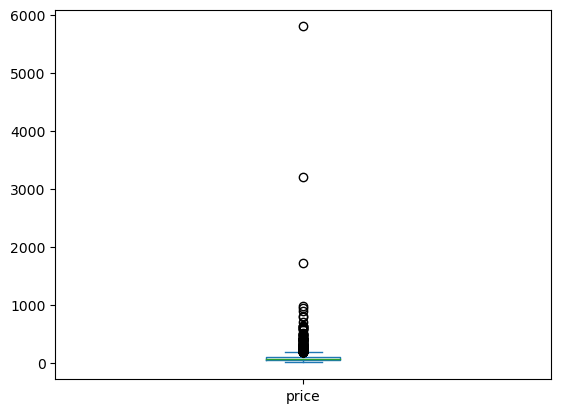

In [44]:
df_1['price'].plot(kind='box')

In [45]:
df_1['price'].describe()

count    1583.000000
mean      112.696682
std       191.977895
min        14.000000
25%        60.437556
50%        80.000000
75%       115.337306
max      5800.000000
Name: price, dtype: float64

In [46]:
# Computing the first quartile (25th percentile) of the 'price' column
q1 = df_1['price'].quantile(.25)

# Computing the third quartile (75th percentile) of the 'price' column
q3 = df_1['price'].quantile(.75)

# Calculating the interquartile range (IQR) of the 'price' column
iqr = q3 - q1

# Computing the lower bound for identifying outliers using the IQR method
lower_bound = q1 - 1.5 * iqr
print(lower_bound)

# Computing the upper bound for identifying outliers using the IQR method
upper_bound = q3 + 1.5 * iqr
print(upper_bound)


-21.912068701009353
197.68693019964547


In [47]:
# Filtering the DataFrame df_1 to remove rows where the 'price' column exceeds the upper bound,
# which was calculated using the interquartile range (IQR) method for outlier detection
df_1 = df_1[df_1['price']<upper_bound].reset_index(drop=True)

In [48]:
df_1

,listing_id,listing_url,name,description,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,...,host_id,price,minimum_nights,maximum_nights,host_name,host_since,host_location,host_about,Exp_in_years,Num_rev
0,50904,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,Decorated in a vintage style combined with a f...,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1 private bath,...,234077,165.329670,1.000000,60.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...,14,2.0
1,891884,https://www.airbnb.com/rooms/891884,aplace/antwerp: amazing suite & square view,This second floor suite with a splendid square...,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1 private bath,...,234077,174.891304,1.293478,1125.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...,14,2.0
2,116134,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,Enjoy your stay at our 4 person apartment in t...,51.230510,4.405930,Entire rental unit,Entire home/apt,4,2.5 baths,...,586942,150.000000,2.000000,1125.0,Paul,2011-05-14,"Kapellen, Flanders, Belgium",My wife Gina and I will be glad to welcome you...,13,120.0
3,218916,https://www.airbnb.com/rooms/218916,Apartment with terrace in trendy Zurenborg,Do you enjoy authentic places with a lot of ch...,51.206330,4.429420,Entire condominium (condo),Entire home/apt,5,1 bath,...,915664,85.000000,1.000000,50.0,Laura,2011-08-03,"Antwerp, Vlaams Gewest, Belgium",I am a photographer and musician. I have a pas...,13,28.0
4,224333,https://www.airbnb.com/rooms/224333,Large stylish room in 1930s house + garden,"Large bedroom in classic 1930s house. Kitchen,...",51.197720,4.458530,Private room in residential home,Private room,2,2 shared baths,...,1167377,16.000000,14.000000,365.0,Geert,2011-09-16,"Antwerp, Flanders, Belgium","I am a person with a job in research, and I li...",13,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433,53898152,https://www.airbnb.com/rooms/53898152,Gelijkvloers gezellig appartement in Antwerpen,Gezellig appartement in rustige buurt<br /><br...,51.218800,4.443700,Entire rental unit,Entire home/apt,2,1 bath,...,30914215,75.000000,2.000000,1125.0,Wouter,2015-04-09,"Boom, Flanders, Belgium",NaN,9,0.0
1434,53912988,https://www.airbnb.com/rooms/53912988,the room with a charming balcony natural light,The room on the 1nd floor has a balcony overlo...,51.243360,4.432770,Private room in casa particular,Private room,2,1 shared bath,...,436739371,27.080645,1.000000,365.0,Naser,2021-12-20,BE,NaN,3,0.0
1435,53913552,https://www.airbnb.com/rooms/53913552,Fantastische loft om in te vertoeven met parking,Deze unieke accommodatie heeft een geheel eige...,51.218570,4.435350,Entire loft,Entire home/apt,2,1 bath,...,164785425,50.000000,1.000000,365.0,Yassin,2017-12-29,"Kontich, Flanders, Belgium",NaN,7,0.0
1436,53916524,https://www.airbnb.com/rooms/53916524,Industrial spacious loft in Antwerp!,Industrial loft (110m²) with a relaxing urban ...,51.231330,4.403520,Entire loft,Entire home/apt,2,1.5 baths,...,46300712,88.000000,3.000000,365.0,Michael,2015-10-11,"Antwerp, Flanders, Belgium",NaN,9,0.0


# Exploratory Data Analysis <a class = "anchor" id="04"></a>


In [49]:
df_1.corr(numeric_only=True)

,listing_id,latitude,longitude,accomodates,bedrooms,beds,host_id,price,minimum_nights,maximum_nights,Exp_in_years,Num_rev
listing_id,1.000000,0.027671,-0.059121,0.150612,-0.009245,0.053369,0.486617,0.025648,0.002711,-0.133920,-0.490490,-0.464959
latitude,0.027671,1.000000,0.140351,0.154209,0.088052,0.119649,0.072522,0.095654,-0.008305,0.033495,-0.068675,0.120214
longitude,-0.059121,0.140351,1.000000,-0.130827,-0.052141,-0.078194,-0.096269,-0.160693,0.004831,0.040823,0.098164,0.011904
accomodates,0.150612,0.154209,-0.130827,1.000000,0.506529,0.693459,0.193244,0.200375,-0.048715,-0.190452,-0.185858,-0.002906
bedrooms,-0.009245,0.088052,-0.052141,0.506529,1.000000,0.819345,0.015471,0.275349,0.009540,0.024601,0.001874,-0.002471
beds,0.053369,0.119649,-0.078194,0.693459,0.819345,1.000000,0.117680,0.190017,-0.015147,-0.064346,-0.108713,0.013446
host_id,0.486617,0.072522,-0.096269,0.193244,0.015471,0.117680,1.000000,0.082533,-0.030660,-0.074162,-0.945417,-0.209916
price,0.025648,0.095654,-0.160693,0.200375,0.275349,0.190017,0.082533,1.000000,-0.039902,0.038130,-0.079140,-0.054325
minimum_nights,0.002711,-0.008305,0.004831,-0.048715,0.009540,-0.015147,-0.030660,-0.039902,1.000000,0.014950,0.021815,-0.058162
maximum_nights,-0.133920,0.033495,0.040823,-0.190452,0.024601,-0.064346,-0.074162,0.038130,0.014950,1.000000,0.073087,0.212180


### Upon examination, we observe a modest correlation  of 'price' column with the 'accommodates' column (0.200375) & 'beds' column (0.190017) , a slightly stronger correlation with the 'bedrooms' column (0.275349). However, the 'price' column shows no significant correlation with other numeric columns in the dataset.

In [50]:
df_1.head()

,listing_id,listing_url,name,description,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,...,host_id,price,minimum_nights,maximum_nights,host_name,host_since,host_location,host_about,Exp_in_years,Num_rev
0,50904,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,Decorated in a vintage style combined with a f...,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1 private bath,...,234077,165.329670,1.000000,60.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...,14,2.0
1,891884,https://www.airbnb.com/rooms/891884,aplace/antwerp: amazing suite & square view,This second floor suite with a splendid square...,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1 private bath,...,234077,174.891304,1.293478,1125.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...,14,2.0
2,116134,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,Enjoy your stay at our 4 person apartment in t...,51.230510,4.405930,Entire rental unit,Entire home/apt,4,2.5 baths,...,586942,150.000000,2.000000,1125.0,Paul,2011-05-14,"Kapellen, Flanders, Belgium",My wife Gina and I will be glad to welcome you...,13,120.0
3,218916,https://www.airbnb.com/rooms/218916,Apartment with terrace in trendy Zurenborg,Do you enjoy authentic places with a lot of ch...,51.206330,4.429420,Entire condominium (condo),Entire home/apt,5,1 bath,...,915664,85.000000,1.000000,50.0,Laura,2011-08-03,"Antwerp, Vlaams Gewest, Belgium",I am a photographer and musician. I have a pas...,13,28.0
4,224333,https://www.airbnb.com/rooms/224333,Large stylish room in 1930s house + garden,"Large bedroom in classic 1930s house. Kitchen,...",51.197720,4.458530,Private room in residential home,Private room,2,2 shared baths,...,1167377,16.000000,14.000000,365.0,Geert,2011-09-16,"Antwerp, Flanders, Belgium","I am a person with a job in research, and I li...",13,3.0


In [51]:
# Counting the occurrences of each unique value in the 'property_type' column within each group.
# then, selecting the top 5 most frequent property types.
df_1.groupby('property_type')['property_type'].count().sort_values(ascending=False)[0:5]

property_type
Entire rental unit                  836
Private room in rental unit          92
Entire condominium (condo)           89
Entire loft                          72
Private room in residential home     67
Name: property_type, dtype: int64

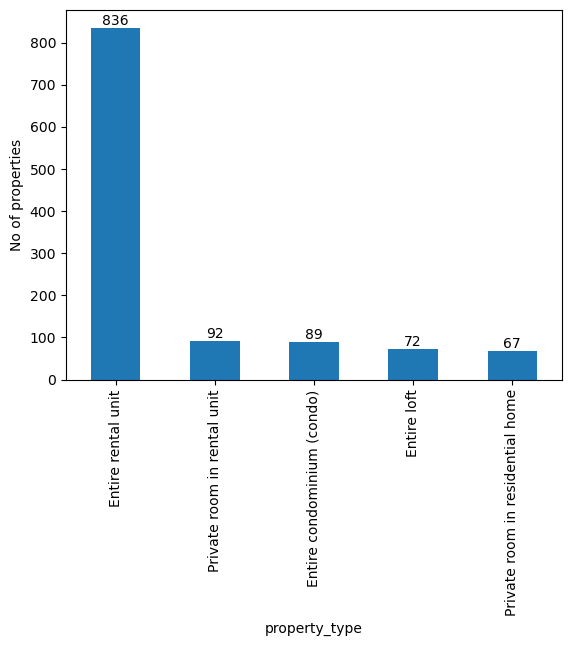

In [52]:
count_prop = df_1.groupby('property_type')['property_type'].count().sort_values(ascending=False)[0:5]
axa =df_1.groupby('property_type')['property_type'].count().sort_values(ascending=False)[0:5].plot(kind='bar')
for i, v in enumerate(count_prop):
    axa.text(i, v, f'{v:.0f}', ha='center', va='bottom')
plt.ylabel('No of properties')
plt.show()

In [53]:
top5_prop = df_1.groupby('property_type')['property_type'].count().sort_values(ascending=False)[0:5].index
df_1[df_1['property_type'].isin(top5_prop)].groupby('property_type')['price'].mean()

property_type
Entire condominium (condo)          89.668861
Entire loft                         98.005762
Entire rental unit                  86.307039
Private room in rental unit         48.142005
Private room in residential home    51.180622
Name: price, dtype: float64

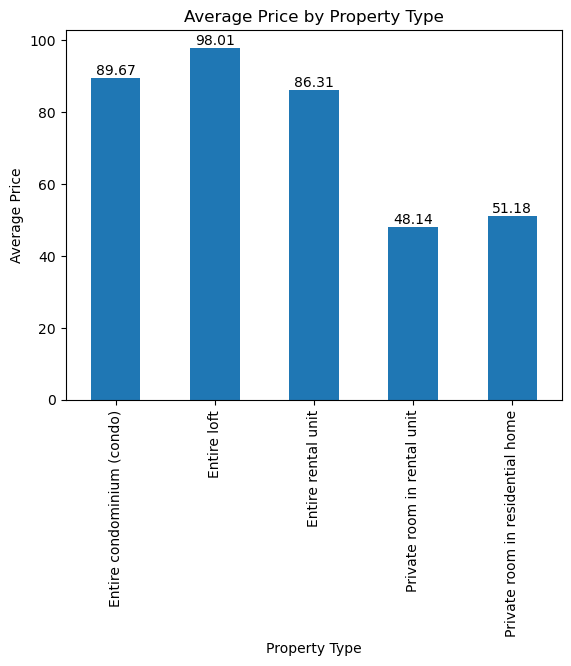

In [54]:
# visualising the average price of top 5 most frequent property types.
mean_prices = df_1[df_1['property_type'].isin(top5_prop)].groupby('property_type')['price'].mean()
ax = mean_prices.plot(kind='bar')

for i, v in enumerate(mean_prices):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.xlabel('Property Type')
plt.ylabel('Average Price')
plt.title('Average Price by Property Type')
plt.show()

The average prices for various property types reveal that 'Entire loft' commands the highest price at 98.01, followed closely by 'Entire condominium' at 89.67. In contrast, 'Private room in rental unit' and 'Private room in residential home' offer more budget-friendly options, with average prices of 48.14 and 51.18 respectively.

room_type
Shared room         55.595559
Private room        60.333393
Entire home/apt     89.768158
Hotel room         118.692235
Name: price, dtype: float64


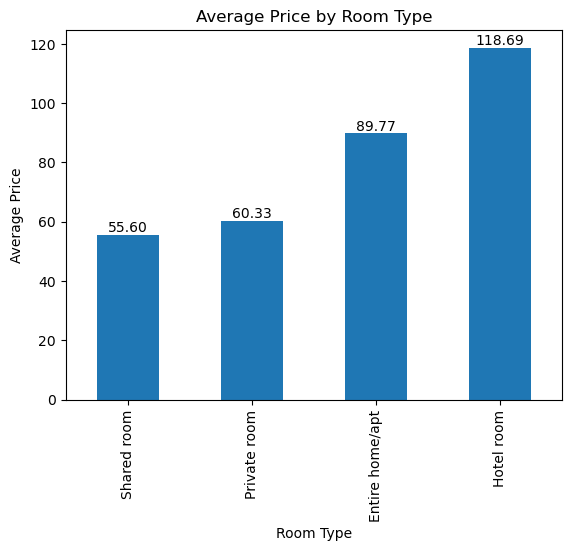

In [55]:
# let's visualise the average price of various room types
mean_prices = df_1.groupby('room_type')['price'].mean().sort_values()
ax = mean_prices.plot(kind='bar')
print(mean_prices)
for i, v in enumerate(mean_prices):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.title('Average Price by Room Type')
plt.show()

#### Average prices vary across different room types. 'Hotel room' commands the highest price at 118.69, followed by 'Entire home/apt' at 89.77. 'Private room' and 'Shared room' offer more affordable options, with average prices of 60.33 and 55.60 respectively.


Text(0.5, 1.0, 'Room Type vs Price')

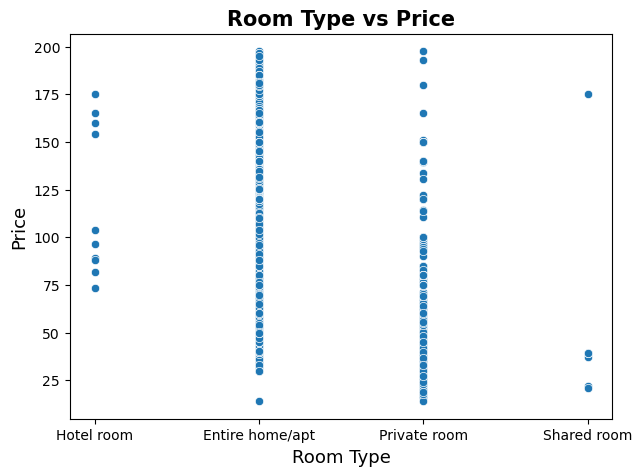

In [56]:
# Distribution of prices among various room types
plt.figure(figsize=(7,5))
sns.scatterplot(x='room_type', y='price', data=df_1)

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price",size=15, weight='bold')

correlation between the 'price' & 'accomodates' column 0.20037507392208354


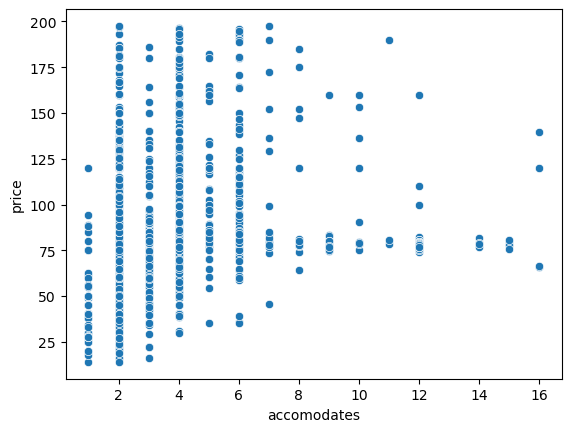

In [57]:
# Scatter plot between 'price' & 'accomodates' column
sns.scatterplot(df_1,x = 'accomodates',y='price')
print("correlation between the 'price' & 'accomodates' column",df_1['price'].corr(df_1['accomodates']))

### A correlation coefficient of 0.20 suggests a modest correlation between the 'price' and 'accommodates' columns. It indicates that as the number of accommodations increases, there is a tendency for the price to also increase slightly.

correlation between the 'price' & 'bedrooms' column 0.27534859047553295


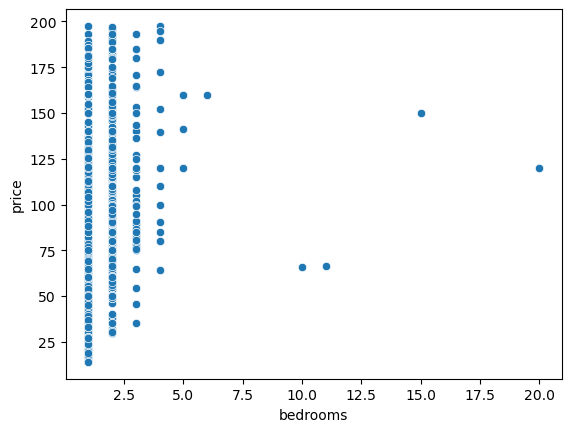

In [58]:
# Scatter plot between 'price' & 'bedrooms' column
sns.scatterplot(df_1,x = 'bedrooms',y='price')
print("correlation between the 'price' & 'bedrooms' column",df_1['price'].corr(df_1['bedrooms']))

### A correlation coefficient of 0.27 suggests a slightly strong correlation between the 'price' and 'bedrooms' columns. It indicates that as the number of bedrooms increases, there is a tendency for the price to also increase.

correlation between the 'price' & 'beds' column 0.19001694992840903


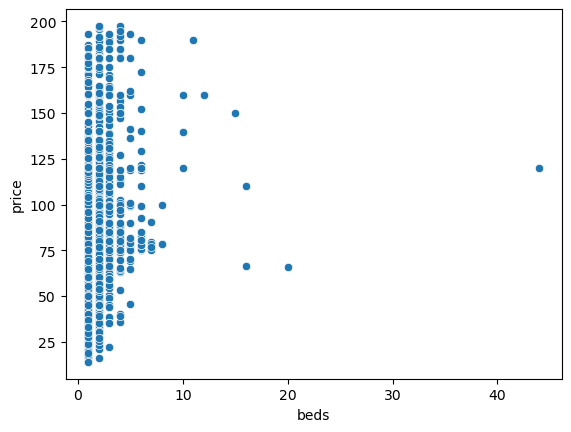

In [59]:
# Scatter plot between 'price' & 'beds' column
sns.scatterplot(df_1,x = 'beds',y='price')
print("correlation between the 'price' & 'beds' column",df_1['price'].corr(df_1['beds']))

### A correlation coefficient of 0.19 suggests a modest correlation between the 'price' and 'beds' columns. It indicates that as the number of beds increases, there is a tendency for the price to also increase slightly.

Text(0.5, 1.0, 'Price vs Number of Reviews')

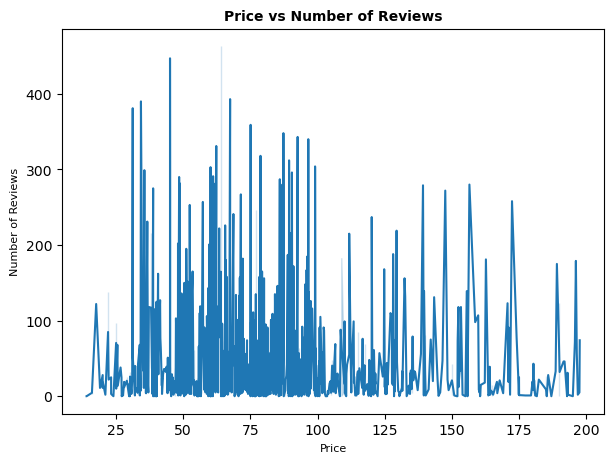

In [81]:
plt.figure(figsize=(7,5))
sns.lineplot(data=df_1, x='price', y='Num_rev' )

plt.xlabel("Price", size=8)
plt.ylabel("Number of Reviews", size=8)
plt.title("Price vs Number of Reviews",size=10, weight='bold')

### This line plot demonstrates that lower price listings have a higher number of reviews compared to the low number of reviews at higher price listings.

# Feature Engineering <a class = "anchor" id="05"></a> 

In [61]:
print("Number of unique values in 'property_type' column : ",df_1['property_type'].nunique())

Number of unique values in 'property_type' column :  36


Given the categorical nature of the 'property_type' column, which contains 36 unique values, it is impractical to perform one-hot encoding due to the large number of categories. Instead, we will focus on the top 5 most frequently occurring property types.

In [62]:
df_1.groupby('property_type')['price'].count().sort_values(ascending=False)[0:5]

property_type
Entire rental unit                  836
Private room in rental unit          92
Entire condominium (condo)           89
Entire loft                          72
Private room in residential home     67
Name: price, dtype: int64

In [63]:
list_prop = df_1.groupby('property_type')['price'].count().sort_values(ascending=False)[0:5]

In [82]:
# generating a customized 'property_type' column containing the top 5 most commonly encountered property types. 
# Any other values found in the 'property_type' column will be designated as 'other_prop'.
df_1['custom_prop_type'] = df_1['property_type'].apply(lambda x: 'other_prop' if x not in list_prop else x)

In [83]:
df_1.head()

,listing_id,listing_url,name,description,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,...,host_name,host_since,host_location,host_about,Exp_in_years,Num_rev,custom_prop_type,bath_type,bath_num,amenities_num
0,50904,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,Decorated in a vintage style combined with a f...,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1 private bath,...,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...,14,2.0,other_prop,private,1.0,33
1,891884,https://www.airbnb.com/rooms/891884,aplace/antwerp: amazing suite & square view,This second floor suite with a splendid square...,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1 private bath,...,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...,14,2.0,other_prop,private,1.0,31
2,116134,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,Enjoy your stay at our 4 person apartment in t...,51.230510,4.405930,Entire rental unit,Entire home/apt,4,2.5 baths,...,Paul,2011-05-14,"Kapellen, Flanders, Belgium",My wife Gina and I will be glad to welcome you...,13,120.0,Entire rental unit,other,2.5,45
3,218916,https://www.airbnb.com/rooms/218916,Apartment with terrace in trendy Zurenborg,Do you enjoy authentic places with a lot of ch...,51.206330,4.429420,Entire condominium (condo),Entire home/apt,5,1 bath,...,Laura,2011-08-03,"Antwerp, Vlaams Gewest, Belgium",I am a photographer and musician. I have a pas...,13,28.0,Entire condominium (condo),other,1.0,41
4,224333,https://www.airbnb.com/rooms/224333,Large stylish room in 1930s house + garden,"Large bedroom in classic 1930s house. Kitchen,...",51.197720,4.458530,Private room in residential home,Private room,2,2 shared baths,...,Geert,2011-09-16,"Antwerp, Flanders, Belgium","I am a person with a job in research, and I li...",13,3.0,Private room in residential home,shared,2.0,12


In [66]:
# To categorize bathroom types, we can identify them as private, shared, and other.
df_1['bathrooms_text'].value_counts()

1 bath               678
1.5 baths            405
1 shared bath        104
1 private bath        89
1.5 shared baths      53
2 baths               35
2.5 baths             33
2 shared baths         7
3 baths                7
2.5 shared baths       7
Shared half-bath       3
3 shared baths         3
4 baths                3
Half-bath              3
3.5 baths              2
5 baths                2
0 baths                1
Private half-bath      1
4 shared baths         1
15.5 baths             1
Name: bathrooms_text, dtype: int64

In [84]:
# generating a custom 'bath_type' column by categorizing bathrooms into three types: private, shared, or other_bath,
# based on the information in the 'bathrooms_text' column.
df_1['bath_type'] = df_1['bathrooms_text'].apply(lambda x: 'private' if 'private' in x.lower() 
                                                 else ('shared' if 'shared' in x.lower() else 'other_bath'))

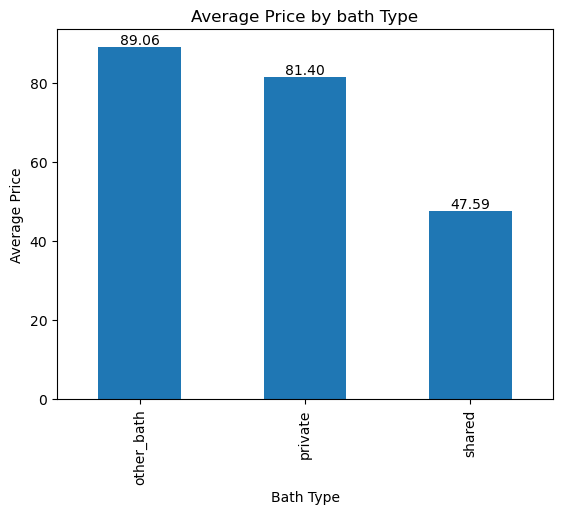

In [85]:
mean_bath = df_1.groupby('bath_type')['price'].mean()
ax1 = df_1.groupby('bath_type')['price'].mean().plot(kind='bar')
for i, v in enumerate(mean_bath):
    ax1.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.xlabel('Bath Type')
plt.ylabel('Average Price')
plt.title('Average Price by bath Type')
plt.show()

### Extracting number of bathrooms in a listing

In [69]:
import re

In [70]:
df_1['bathrooms_text'] = df_1['bathrooms_text'].apply(lambda x: '0.5' if 'half' in x.lower() else x)

In [71]:
# implementing a new column to denote the number of bathrooms available in each listing.
df_1['bath_num'] = df_1['bathrooms_text'].apply(lambda x: float(re.findall(r'\d+\.\d+|\d+', x)[0]))

In [72]:
df_1.head()

,listing_id,listing_url,name,description,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,...,maximum_nights,host_name,host_since,host_location,host_about,Exp_in_years,Num_rev,custom_prop_type,bath_type,bath_num
0,50904,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,Decorated in a vintage style combined with a f...,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1 private bath,...,60.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...,14,2.0,other,private,1.0
1,891884,https://www.airbnb.com/rooms/891884,aplace/antwerp: amazing suite & square view,This second floor suite with a splendid square...,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1 private bath,...,1125.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...,14,2.0,other,private,1.0
2,116134,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,Enjoy your stay at our 4 person apartment in t...,51.230510,4.405930,Entire rental unit,Entire home/apt,4,2.5 baths,...,1125.0,Paul,2011-05-14,"Kapellen, Flanders, Belgium",My wife Gina and I will be glad to welcome you...,13,120.0,Entire rental unit,other,2.5
3,218916,https://www.airbnb.com/rooms/218916,Apartment with terrace in trendy Zurenborg,Do you enjoy authentic places with a lot of ch...,51.206330,4.429420,Entire condominium (condo),Entire home/apt,5,1 bath,...,50.0,Laura,2011-08-03,"Antwerp, Vlaams Gewest, Belgium",I am a photographer and musician. I have a pas...,13,28.0,Entire condominium (condo),other,1.0
4,224333,https://www.airbnb.com/rooms/224333,Large stylish room in 1930s house + garden,"Large bedroom in classic 1930s house. Kitchen,...",51.197720,4.458530,Private room in residential home,Private room,2,2 shared baths,...,365.0,Geert,2011-09-16,"Antwerp, Flanders, Belgium","I am a person with a job in research, and I li...",13,3.0,Private room in residential home,shared,2.0


### Extracting Number of Amenities in a listing

In [73]:
import ast

In [74]:
# Creating a new column named "amenities_num" to indicate the count of amenities within a listing.
df_1['amenities_num'] = df_1['amenities'].apply(lambda x: len(ast.literal_eval(x)))

In [75]:
df_1.head()

,listing_id,listing_url,name,description,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,...,host_name,host_since,host_location,host_about,Exp_in_years,Num_rev,custom_prop_type,bath_type,bath_num,amenities_num
0,50904,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,Decorated in a vintage style combined with a f...,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1 private bath,...,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...,14,2.0,other,private,1.0,33
1,891884,https://www.airbnb.com/rooms/891884,aplace/antwerp: amazing suite & square view,This second floor suite with a splendid square...,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1 private bath,...,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...,14,2.0,other,private,1.0,31
2,116134,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,Enjoy your stay at our 4 person apartment in t...,51.230510,4.405930,Entire rental unit,Entire home/apt,4,2.5 baths,...,Paul,2011-05-14,"Kapellen, Flanders, Belgium",My wife Gina and I will be glad to welcome you...,13,120.0,Entire rental unit,other,2.5,45
3,218916,https://www.airbnb.com/rooms/218916,Apartment with terrace in trendy Zurenborg,Do you enjoy authentic places with a lot of ch...,51.206330,4.429420,Entire condominium (condo),Entire home/apt,5,1 bath,...,Laura,2011-08-03,"Antwerp, Vlaams Gewest, Belgium",I am a photographer and musician. I have a pas...,13,28.0,Entire condominium (condo),other,1.0,41
4,224333,https://www.airbnb.com/rooms/224333,Large stylish room in 1930s house + garden,"Large bedroom in classic 1930s house. Kitchen,...",51.197720,4.458530,Private room in residential home,Private room,2,2 shared baths,...,Geert,2011-09-16,"Antwerp, Flanders, Belgium","I am a person with a job in research, and I li...",13,3.0,Private room in residential home,shared,2.0,12


In [76]:
print("correlation between 'price' & 'amenities_num column : ", df_1['price'].corr(df_1['amenities_num']))

correlation between 'price' & 'amenities_num column :  0.11211962972277648


A correlation coefficient of 0.11 indicates a mild positive association between the price and the "amenities_num" column.

# Modelling <a class = "anchor" id="06"></a> 

In [77]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   listing_id        1438 non-null   int64         
 1   listing_url       1438 non-null   object        
 2   name              1438 non-null   object        
 3   description       1387 non-null   object        
 4   latitude          1438 non-null   float64       
 5   longitude         1438 non-null   float64       
 6   property_type     1438 non-null   object        
 7   room_type         1438 non-null   object        
 8   accomodates       1438 non-null   int64         
 9   bathrooms_text    1438 non-null   object        
 10  bedrooms          1438 non-null   float64       
 11  beds              1438 non-null   float64       
 12  amenities         1438 non-null   object        
 13  host_id           1438 non-null   int64         
 14  price             1438 n

In [86]:
df = df_1[['room_type','accomodates','bedrooms','beds','price','minimum_nights','maximum_nights','Exp_in_years','Num_rev','custom_prop_type','bath_type','bath_num','amenities_num']]

In [87]:
df.head()

,room_type,accomodates,bedrooms,beds,price,minimum_nights,maximum_nights,Exp_in_years,Num_rev,custom_prop_type,bath_type,bath_num,amenities_num
0,Hotel room,2,1.0,1.0,165.329670,1.000000,60.0,14,2.0,other_prop,private,1.0,33
1,Hotel room,2,1.0,1.0,174.891304,1.293478,1125.0,14,2.0,other_prop,private,1.0,31
2,Entire home/apt,4,2.0,2.0,150.000000,2.000000,1125.0,13,120.0,Entire rental unit,other_bath,2.5,45
3,Entire home/apt,5,1.0,3.0,85.000000,1.000000,50.0,13,28.0,Entire condominium (condo),other_bath,1.0,41
4,Private room,2,1.0,1.0,16.000000,14.000000,365.0,13,3.0,Private room in residential home,shared,2.0,12
